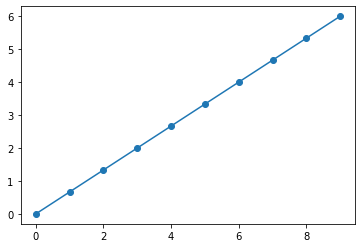

In [11]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

x = [i for i in range(10)]
y = [i*2 /3 for i in range(10)]

plt.plot(x,y)
plt.scatter(x,y)
# plt.show()
plt.savefig("linear plot")

In [26]:
import pandas as pd


df = pd.read_csv('train.csv')
# get top 5
data_top = df.head()  
data_top



In [16]:
# Show column names
print(*(df.columns), sep=', ')

ID, FoodGroup, Descrip, Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, VitA_mcg, VitB6_mg, VitB12_mcg, VitC_mg, VitE_mg, Folate_mcg, Niacin_mg, Riboflavin_mg, Thiamin_mg, Calcium_mg, Copper_mcg, Iron_mg, Magnesium_mg, Manganese_mg, Phosphorus_mg, Selenium_mcg, Zinc_mg, VitA_USRDA, VitB6_USRDA, VitB12_USRDA, VitC_USRDA, VitE_USRDA, Folate_USRDA, Niacin_USRDA, Riboflavin_USRDA, Thiamin_USRDA, Calcium_USRDA, Copper_USRDA, Magnesium_USRDA, Phosphorus_USRDA, Selenium_USRDA, Zinc_USRDA


In [22]:
# Show Unique items under Food Groups column
print(*df.FoodGroup.unique(), sep='\n')

Legumes and Legume Products
Baked Products
Finfish and Shellfish Products
Breakfast Cereals
Cereal Grains and Pasta
Sweets
Dairy and Egg Products
Fruits and Fruit Juices
Beverages
Vegetables and Vegetable Products
Restaurant Foods
Fast Foods
Lamb, Veal, and Game Products
Snacks
Sausages and Luncheon Meats
Poultry Products
Baby Foods
Meals, Entrees, and Side Dishes
Soups, Sauces, and Gravies
American Indian/Alaska Native Foods
Pork Products
Beef Products
Spices and Herbs
Fats and Oils
Nut and Seed Products


Legumes and Legume Products
Baked Products
Finfish and Shellfish Products
Breakfast Cereals
Cereal Grains and Pasta
Sweets
Dairy and Egg Products
Fruits and Fruit Juices
Beverages
Vegetables and Vegetable Products
Restaurant Foods
Fast Foods
Lamb, Veal, and Game Products
Snacks
Sausages and Luncheon Meats
Poultry Products
Baby Foods
Meals, Entrees, and Side Dishes
Soups, Sauces, and Gravies
American Indian/Alaska Native Foods
Pork Products
Beef Products
Spices and Herbs
Fats and Oils
Nut and Seed Products
